## Libraries

In [1]:
## Importing Data and Feature Engineering
import requests
import pandas as pd
import numpy as np
import json
from datetime import datetime,timedelta
from functools import reduce

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
sns.set()

## Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Functions

In [2]:
def get_econ_data(ind_str,api_key):
  econ_ind = ind_str
  econ_json = requests.get(f"https://financialmodelingprep.com/api/v4/economic?name={econ_ind}&apikey={api_key}").json()
  econ_df = pd.json_normalize(econ_json)
  econ_df = econ_df.sort_values(by=['date']).reset_index(drop=True)
  econ_df.set_index('date', inplace=True)
  econ_df.index = pd.to_datetime(econ_df.index)
  return econ_df

In [3]:
class CustomQuarterBegin(pd.tseries.offsets.DateOffset):
    def apply(self, other):
        return other + pd.DateOffset(days=(1 - (other.month - 1) % 3))

def q_resample(df,func):
  first_january_index = df.index.get_loc(df[df.index.month == 1].index[0])
  df_trimmed = df.iloc[first_january_index:]
  if func == "avg":
    df_trimmed = df_trimmed.resample('Q', closed='left', label='left', loffset=CustomQuarterBegin()).mean()
  elif func == "sum":
    df_trimmed = df_trimmed.resample('Q', closed='left', label='left', loffset=CustomQuarterBegin()).sum()
  return df_trimmed

In [4]:
api_key = "your_api_key_here"
econ_ind_names = ["GDP", "realGDP", "nominalPotentialGDP",
                  "realGDPPerCapita", "federalFunds", "CPI",
                  "inflationRate", "inflation", "retailSales",
                  "consumerSentiment", "durableGoods", "unemploymentRate",
                  "totalNonfarmPayroll", "initialClaims", "industrialProductionTotalIndex",
                  "newPrivatelyOwnedHousingUnitsStartedTotalUnits", "totalVehicleSales",
                  "retailMoneyFunds", "smoothedUSRecessionProbabilities", "3MonthOr90DayRatesAndYieldsCertificatesOfDeposit",
                  "commercialBankInterestRateOnCreditCardPlansAllAccounts", "30YearFixedRateMortgageAverage",
                  "15YearFixedRateMortgageAverage"]

## Data

#### Importing Data

In [5]:
## GDP | Quarterly Data | Converted to Growth | 1947 Start
GDP = get_econ_data(ind_str = "GDP",api_key = api_key)
GDP = GDP.pct_change()

## realGDPPerCapita | Quarterly Data | Converted to Growth | 1947 Start
realGDPPerCapita = get_econ_data(ind_str = "realGDPPerCapita",api_key = api_key)
realGDPPerCapita = realGDPPerCapita.pct_change()

## federalFunds | Monthly Data | Resampled Quarterly by Average | 1955 Start
federalFunds = get_econ_data(ind_str = "federalFunds",api_key = api_key)
federalFunds = q_resample(df = federalFunds,func = "avg")

## CPI | Monthly Data | Resampled Quarterly by Average | Converted to Growth | 1947 Start
CPI = get_econ_data(ind_str = "CPI",api_key = api_key)
CPI = q_resample(df = CPI,func = "avg")
CPI = CPI.pct_change()

## retailSales | Monthly Data | Resampled Quarterly by Sum | Converted to Growth | 1992 Start
retailSales = get_econ_data(ind_str = "retailSales",api_key = api_key)
retailSales = q_resample(df = retailSales,func = "sum")
retailSales = retailSales.pct_change()

## durableGoods | Monthly Data | Resampled Quarterly by Sum | Converted to Growth | 1993 Start
durableGoods = get_econ_data(ind_str = "durableGoods",api_key = api_key)
durableGoods = q_resample(df = durableGoods,func = "sum")
durableGoods = durableGoods.pct_change()

## unemploymentRate | Monthly Data | Resampled Quarterly by Avg | 1948 Start
unemploymentRate = get_econ_data(ind_str = "unemploymentRate",api_key = api_key)
unemploymentRate = q_resample(df = unemploymentRate,func = "avg")

## totalNonfarmPayroll | Monthly Data | Resampled Quarterly by Sum | Converted to Growth | 1939 Start
totalNonfarmPayroll = get_econ_data(ind_str = "totalNonfarmPayroll",api_key = api_key)
totalNonfarmPayroll = q_resample(df = totalNonfarmPayroll,func = "sum")
totalNonfarmPayroll = totalNonfarmPayroll.pct_change()

## initialClaims | Weekly Data | Resampled Quarterly by Sum | Converted to Growth | 1967 Start
initialClaims = get_econ_data(ind_str = "initialClaims",api_key = api_key)
initialClaims = q_resample(df = initialClaims,func = "sum")
initialClaims = initialClaims.pct_change()

## industrialProductionTotalIndex | Monthly Data | Resampled Quarterly by Sum  | Converted to Growth | 1919 Start
industrialProductionTotalIndex = get_econ_data(ind_str = "industrialProductionTotalIndex",api_key = api_key)
industrialProductionTotalIndex = q_resample(df = industrialProductionTotalIndex,func = "sum")
industrialProductionTotalIndex = industrialProductionTotalIndex.pct_change()

## newPrivatelyOwnedHousingUnitsStartedTotalUnits | Monthly Data | Resampled Quarterly by Sum | Converted to Growth | 1959 Start
newPrivatelyOwnedHousingUnitsStartedTotalUnits = get_econ_data(ind_str = "newPrivatelyOwnedHousingUnitsStartedTotalUnits",api_key = api_key)
newPrivatelyOwnedHousingUnitsStartedTotalUnits = q_resample(df = newPrivatelyOwnedHousingUnitsStartedTotalUnits,func = "sum")
newPrivatelyOwnedHousingUnitsStartedTotalUnits = newPrivatelyOwnedHousingUnitsStartedTotalUnits.pct_change()

## totalVehicleSales | Monthly Data | Resampled Quarterly by Sum | Converted to Growth | 1976 Start
totalVehicleSales = get_econ_data(ind_str = "totalVehicleSales",api_key = api_key)
totalVehicleSales = q_resample(df = totalVehicleSales,func = "sum")
totalVehicleSales = totalVehicleSales.pct_change()

## retailMoneyFunds | Monthly Data | Resampled Quarterly by Avg | 1965 Start
ThreeMonthOr90DayRatesAndYieldsCertificatesOfDeposit = get_econ_data(ind_str="3MonthOr90DayRatesAndYieldsCertificatesOfDeposit",api_key = api_key)
ThreeMonthOr90DayRatesAndYieldsCertificatesOfDeposit = q_resample(df = ThreeMonthOr90DayRatesAndYieldsCertificatesOfDeposit,func = "avg")

## 30YearFixedRateMortgageAverage | Weekly Data | Resampled Quarterly by Avg | 1972 Start
ThirtyYearFixedRateMortgageAverage = get_econ_data(ind_str="30YearFixedRateMortgageAverage",api_key = api_key)
ThirtyYearFixedRateMortgageAverage = q_resample(df = ThirtyYearFixedRateMortgageAverage,func = "avg")

<ipython-input-3-42b7eff000b2>:9: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_trimmed = df_trimmed.resample('Q', closed='left', label='left', loffset=CustomQuarterBegin()).mean()
<ipython-input-3-42b7eff000b2>:9: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  df_trimmed = df_trimmed.resample('Q', closed='left', label='left', loffset=CustomQuarterBegin()).mean()
<ipython-input-3-42b7eff000b2>:11: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from p

#### Merging

In [6]:
dfs = [GDP,realGDPPerCapita,federalFunds,CPI,retailSales,durableGoods,unemploymentRate,totalNonfarmPayroll,initialClaims,
       industrialProductionTotalIndex,newPrivatelyOwnedHousingUnitsStartedTotalUnits,totalVehicleSales,
       ThreeMonthOr90DayRatesAndYieldsCertificatesOfDeposit,ThirtyYearFixedRateMortgageAverage]

c_names = ["GDP_Growth","realGDPPerCapita_Growth","federalFunds","CPI_Growth","retailSales_Growth","durableGoods_Growth",
           "unemploymentRate","totalNonfarmPayroll_Growth","initialClaims_Growth","industrialProductionTotalIndex_Growth",
           "newPrivatelyOwnedHousingUnitsStartedTotalUnits_Growth","totalVehicleSales_Growth",
           "ThreeMonthOr90DayRatesAndYieldsCertificatesOfDeposit","ThirtyYearFixedRateMortgageAverage"]

merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), dfs)
merged_df.columns = c_names

<ipython-input-6-d7634d1ff67b>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), dfs)
<ipython-input-6-d7634d1ff67b>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), dfs)
<ipython-input-6-d7634d1ff67b>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), dfs)
<ipython-input-6-d7634d1ff67b>:10: FutureWarning: Passing 'suffixes' which cause duplicate columns {'value_x'} in the result is deprecated and will raise a M

#### Glimpsing the Data | Does it make sense?

In [7]:
merged_df.head()

,GDP_Growth,realGDPPerCapita_Growth,federalFunds,CPI_Growth,retailSales_Growth,durableGoods_Growth,unemploymentRate,totalNonfarmPayroll_Growth,initialClaims_Growth,industrialProductionTotalIndex_Growth,newPrivatelyOwnedHousingUnitsStartedTotalUnits_Growth,totalVehicleSales_Growth,ThreeMonthOr90DayRatesAndYieldsCertificatesOfDeposit,ThirtyYearFixedRateMortgageAverage
date,,,,,,,,,,,,,,
1993-01-01,0.007283,-0.001272,3.040000,0.007275,0.012653,NaN,7.133333,0.005837,-0.044525,0.009127,-0.049389,-0.022259,3.140000,7.755385
1993-04-01,0.011811,0.002768,3.000000,0.007223,0.023770,0.018245,7.066667,0.005415,0.005128,0.002058,0.084214,0.095190,3.133333,7.453077
1993-07-01,0.010745,0.001343,3.060000,0.004626,0.018488,0.001526,6.800000,0.006357,-0.007542,0.003750,0.026066,-0.034707,3.140000,7.087692
1993-10-01,0.019128,0.010391,2.990000,0.008289,0.022228,0.032236,6.633333,0.006955,-0.015422,0.015601,0.103669,0.065961,3.283333,7.040000
1994-01-01,0.014531,0.007001,3.213333,0.005024,0.021010,0.037930,6.566667,0.007654,0.029058,0.012355,-0.029761,0.031319,3.450000,7.283077


In [8]:
correlation_matrix = merged_df.corr()
correlation_matrix = round(correlation_matrix,2)

# Create a Plotly Heatmap without annotations
heatmap = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                                    x=correlation_matrix.columns,
                                    y=correlation_matrix.columns,
                                    colorscale='Viridis'))

# Add annotations to the layout
annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(dict(x=correlation_matrix.columns[j],
                                y=correlation_matrix.index[i],
                                text=str(value),
                                showarrow=False,
                                font=dict(color='black' if abs(value) > 0.55 else 'white')))

heatmap.update_layout(title='Correlation Matrix',
                      xaxis=dict(title='Features'),
                      yaxis=dict(title='Features'),
                      width=1400,
                      height=1200,
                      annotations=annotations)

# Show the plot
heatmap.show()


#### Dropping Unnecesary Columns

In [9]:
cols_to_drop = ["ThreeMonthOr90DayRatesAndYieldsCertificatesOfDeposit",
                "ThirtyYearFixedRateMortgageAverage",
                "industrialProductionTotalIndex_Growth",
                "totalNonfarmPayroll_Growth",
                "realGDPPerCapita_Growth",
                "retailSales_Growth",
                "durableGoods_Growth"]

merged_df.drop(columns=cols_to_drop, inplace=True)

In [10]:
correlation_matrix = merged_df.corr()
correlation_matrix = round(correlation_matrix,2)

# Create a Plotly Heatmap without annotations
heatmap = go.Figure(data=go.Heatmap(z=correlation_matrix.values,
                                    x=correlation_matrix.columns,
                                    y=correlation_matrix.columns,
                                    colorscale='Viridis'))

# Add annotations to the layout
annotations = []
for i, row in enumerate(correlation_matrix.values):
    for j, value in enumerate(row):
        annotations.append(dict(x=correlation_matrix.columns[j],
                                y=correlation_matrix.index[i],
                                text=str(value),
                                showarrow=False,
                                font=dict(color='black' if abs(value) > 0.55 else 'white')))

heatmap.update_layout(title='Correlation Matrix',
                      xaxis=dict(title='Features'),
                      yaxis=dict(title='Features'),
                      width=1400,
                      height=1200,
                      annotations=annotations)

# Show the plot
heatmap.show()


#### Standardization

In [11]:
merged_df_no_na = merged_df.dropna()
scaler = StandardScaler()
merged_df_scaled = pd.DataFrame(scaler.fit_transform(merged_df_no_na))
merged_df_scaled.head()

,0,1,2,3,4,5,6
0,-0.339071,0.265522,0.178790,0.810796,-0.200615,-0.702548,-0.385869
1,0.008631,0.247198,0.169388,0.773241,-0.053671,1.063305,1.363294
2,-0.073245,0.274684,-0.295132,0.623020,-0.091168,0.294764,-0.571249
3,0.570533,0.242617,0.360194,0.529132,-0.114489,1.320457,0.927983
4,0.217497,0.344926,-0.224003,0.491577,0.017147,-0.443109,0.412069


## KMeans Model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

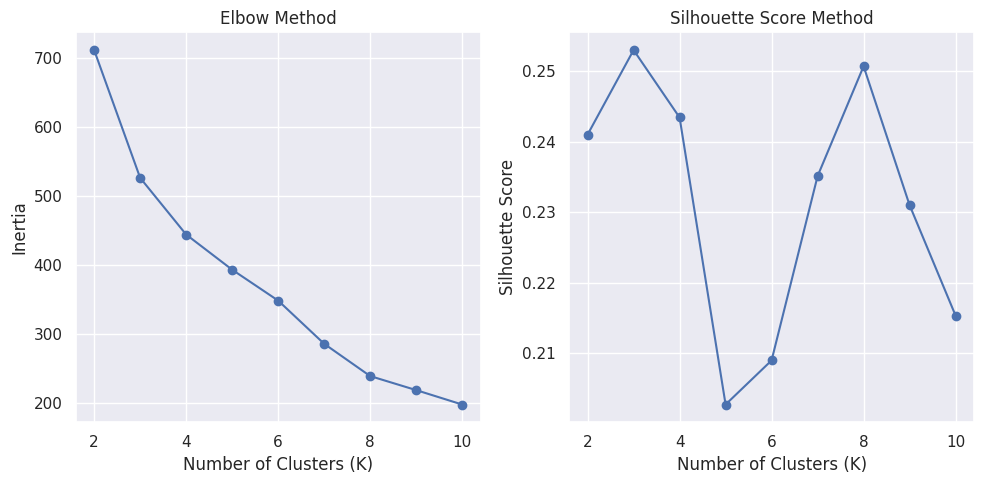

In [12]:
inertia_values = []
silhouette_scores = []
k_values = range(2, 11)  # You can adjust the range based on your problem

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(merged_df_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(merged_df_scaled, kmeans.labels_))

# Plot the elbow curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [14]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(merged_df_scaled)

merged_df_no_na['Cluster_Labels'] = kmeans.labels_
merged_df_no_na.groupby("Cluster_Labels").mean()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,GDP_Growth,federalFunds,CPI_Growth,unemploymentRate,initialClaims_Growth,newPrivatelyOwnedHousingUnitsStartedTotalUnits_Growth,totalVehicleSales_Growth
Cluster_Labels,,,,,,,
0,0.012985,0.503407,0.005018,7.055556,-0.053098,0.040700,0.032326
1,-0.030804,0.502500,-0.008961,7.975000,1.356402,-0.165021,-0.165886
2,0.013213,3.756261,0.007865,4.742793,-0.002361,-0.009572,-0.004624


In [15]:
mapping = {0: 'Transition to Growth', 1: 'Contraction', 2: 'Slowing Growth'}

# Applying the mapping
merged_df_no_na['Cluster_Labels'] = merged_df_no_na['Cluster_Labels'].map(mapping)

In [17]:
merged_df_no_na['year'] = merged_df_no_na.index.year
result = merged_df_no_na.groupby(['year', 'Cluster_Labels']).size().unstack(fill_value=0)
result_percent = result.divide(result.sum(axis=1), axis=0) * 100

fig = px.bar(result_percent,
             barmode='stack',
             color_discrete_sequence=px.colors.qualitative.D3,
             labels={'index': 'Year', 'value': 'Percentage'},
             title='100% Stacked Bar Chart by Year and Cluster Label')

fig.show()